## Instructions

###### * poi_id.py : Starter code for the POI identifier, you will write your analysis here. You will also submit a version of this file for your evaluator to verify your algorithm and results.  


###### * final_project_dataset.pkl : The dataset for the project, more details below. 


### What to Include

When making your classifier, you will create three pickle files:
* my_dataset.pkl
* my_classifier.pkl
* my_feature_list.pkl

The project evaluator will test these using the _tester.py_ script. You are encouraged to use this script before submitting to gauge if your performance is good enough. 

* You should also include your modified *poi_id.py*

## Process Notes
1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]  
      <br>
2.  What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]  
<br>
* What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]  
<br>
* What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]  
<br>
* What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]  
<br>
* Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]


## References
Web sites, books, forums, blog posts, github repositories etc. 

* “I hereby confirm that this submission is my work. I have cited above the origins of any parts of the submission that were taken from Websites, books, forums, blog posts, github repositories, etc.  
<br>
* code snippets from what we worked on in class 2/10/17

## Setup, and Load Data

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import pickle as pkl # to load the data

%matplotlib inline

path = "/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/"
os.chdir(path)
os.getcwd()
os.listdir()

['my_dataset.pkl',
 'tester.py',
 'final_project_dataset_modified.pkl',
 'poi_email_addresses.py',
 'final_project_dataset.pkl',
 '__pycache__',
 'my_classifier.pkl',
 'poi_names.txt',
 'my_feature_list.pkl',
 'poi_id.py',
 'enron61702insiderpay.pdf',
 'emails_by_address']

> Set path and import necessary modules

In [135]:
# create open file object
en_pkl = open("/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/final_project_dataset.pkl", "rb")
# unpickle file
en_data = pkl.load(en_pkl)

> Unpickle enron data

In [137]:
# load unpickled dict into data frame
en_df = pd.DataFrame(en_data)
en_df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


> Check out the new dataframe.

> This isn't good; the rows are the features, and the columns represent each record, or person. The data needs to flipped around so that each record is a row, and the columns hold features.

In [138]:
# make rows columns and vice versa
en_df = en_df.transpose()
en_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


> Transposing the data fixed the row - column issue. 

> The only issue now is that the subject names resides in the dataframe index. This info needs to be turned into a feature / column.

> I'll do *df.reset_index( )* to fix this.

In [139]:
# make the index values (person names) be their own column
en_df = en_df.reset_index()
en_df.head()

,index,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
1,BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
2,BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
3,BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
4,BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


> And it works!  The dataframe looks good now.  Time to dig a little deeper and check into the quality of the data.

## Examine Data for Quality 

In [7]:
en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
index                        146 non-null object
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receip

> Running *df.info()* gives me a basic overview of the data shape and column data types.

> I see that there are 146 records, and 22 columns.

> Each column has 146 values. The data-type for each of the columns is *non-null object*. This is confusing, because looking at the first few rows of the dataframe reveals that there are plenty of *'NaN'* values, which means that at least some of the columns should have less than 146 values. Also, the data types of the various features are clearly not all *'non-null object'*.  There should be string types, numerics, integers, and booleans. 

> I'll take a closer look at the NaNs to see if there is some issue with them.

In [19]:
print(en_df['bonus'].iloc[1])
print(type(en_df['bonus'].iloc[1]))

NaN
<class 'str'>


> I checked out one of the NaNs in the bonus column. It prints out as 'NaN', but when I check the data type of that value, it is:

> ```<class 'str'>```

> So, this means that the NaNs are the string "NaN" rather than the numpy NaN object. I will have to convert all these strings to the actual object.

In [140]:
# replace "NaN" strings with np.nan objects
en_df.replace(to_replace='NaN', value=np.nan, inplace=True)

en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
index                        146 non-null object
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt

> After running *df.replace( )* on the dataframe, *df.info( )* shows a different picture than it did before.

> Only one column ('poi'), has 146 values, the rest have from 4 to 126 values. 

> The only datatypes are 'non-null object', float, and bool. The columns that contain text, *'index'* and *'email_address'*, show the type object. I think they should show string, so I'll look into that.

In [141]:
print(en_df['email_address'].head(n=2), "\n")

print("type for email address:", type(en_df['email_address'].iloc[0]), "\n")

print("type for NaN:", type(en_df['email_address'].iloc[1]))

0    phillip.allen@enron.com
1                        NaN
Name: email_address, dtype: object 

type for email address: <class 'str'> 

type for NaN: <class 'float'>


> I printed the first two records in the *'email_address'* column. The first is text, the second is a NaN. I got the data type of each one, which shows that the email address is a string, and the NaN is a float.

> As it turns out, *type(np.nan)* is *float*, and when strings and floats are in the same pandas series, the column data type is downcast to *object*.  Case closed.

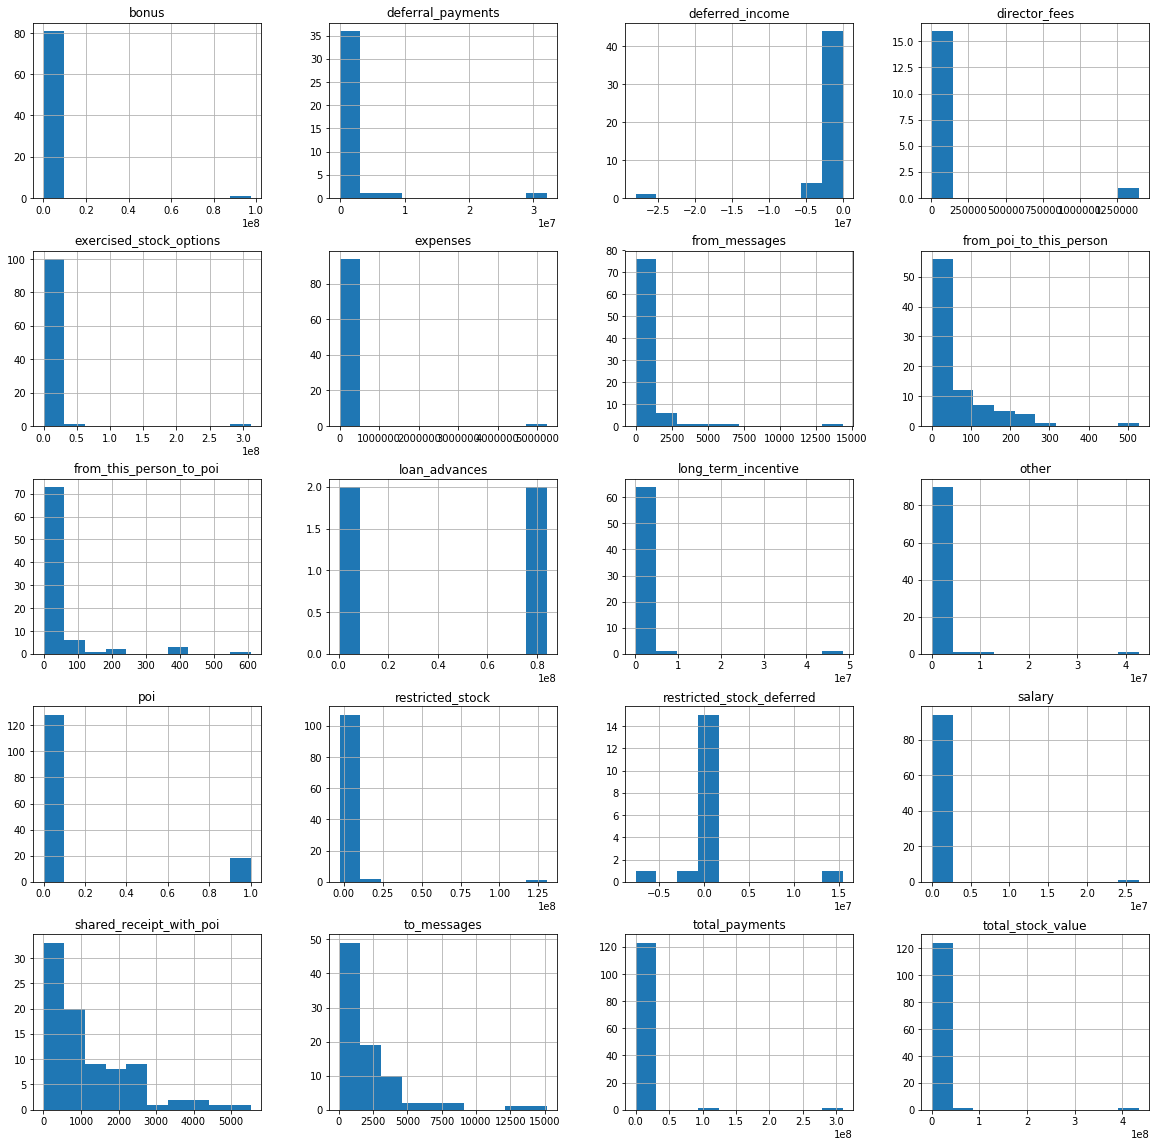

In [142]:
en_df.hist( figsize=(20,20));

> The numeric data all looks pretty messed up. It looks like there are ouliers distorting the plots. I'll trim the top 5% of largest vales and re-plot.

In [152]:
round(en_df.describe())

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.0,39.0,49.0,17.0,102.0,95.0,86.0,86.0,86.0,4.0,66.0,93.0,110.0,18.0,95.0,86.0,86.0,125.0,126.0
mean,2374235.0,1642674.0,-1140475.0,166805.0,5987054.0,108729.0,609.0,65.0,41.0,41962500.0,1470361.0,919065.0,2321741.0,166411.0,562194.0,1176.0,2074.0,5081526.0,6773957.0
std,10713328.0,5161930.0,4025406.0,319891.0,31062007.0,533535.0,1841.0,87.0,100.0,47083209.0,5942759.0,4589253.0,12518278.0,4201494.0,2716369.0,1178.0,2583.0,29061716.0,38957773.0
min,70000.0,-102500.0,-27992891.0,3285.0,3285.0,148.0,12.0,0.0,0.0,400000.0,69223.0,2.0,-2604490.0,-7576788.0,477.0,2.0,57.0,148.0,-44093.0
25%,431250.0,81573.0,-694862.0,98784.0,527886.0,22614.0,23.0,10.0,1.0,1600000.0,281250.0,1215.0,254018.0,-389622.0,211816.0,250.0,541.0,394475.0,494510.0
50%,769375.0,227449.0,-159792.0,108579.0,1310814.0,46950.0,41.0,35.0,8.0,41762500.0,442035.0,52382.0,451740.0,-146975.0,259996.0,740.0,1211.0,1101393.0,1102872.0
75%,1200000.0,1002672.0,-38346.0,113784.0,2547724.0,79952.0,146.0,72.0,25.0,82125000.0,938672.0,362096.0,1002370.0,-75010.0,312117.0,1888.0,2635.0,2093263.0,2949847.0
max,97343619.0,32083396.0,-833.0,1398517.0,311764000.0,5235198.0,14368.0,528.0,609.0,83925000.0,48521928.0,42667589.0,130322299.0,15456290.0,26704229.0,5521.0,15149.0,309886585.0,434509511.0


> Since so many of the columns appear to have outrageously large outliers, I want to look at what those values are and if they seem reasonable in context.

> I run *df.describe( )* to get a statistical overview of each column in the dataframe.

> The max for *exercised_stock_options*, for example, is 311,764,000. The mean is 5 million, two orders of magnitude lower, which doesn't seem reasonable. 311 million doesn't seem reasonable, even in the context of exercised_stock_options. 

> I need to take a closer look at some actual records. 

In [144]:
en_df.loc[en_df['total_payments'] > en_df['total_payments'].quantile(.95)]

,index,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
11,BHATNAGAR SANJAY,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,...,NaN,137864.0,False,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN
47,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,...,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
78,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0
79,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
86,MARTIN AMANDA K,NaN,85430.0,NaN,NaN,a..martin@enron.com,2070306.0,8211.0,230.0,8.0,...,5145434.0,2818454.0,False,NaN,NaN,349487.0,477.0,1522.0,8407016.0,2070306.0
122,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
130,TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,...,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


> When I check out the records whose *total_payments* value is above the 95th percentile, I find a very interesting record at the bottom, the "TOTAL" record. Even though the other high rollers in this selection have high bonues and exercised stock options, the "TOTAL" values for those variables are still an order of magnitude higher.

> If we remove this value, the histograms should look a lot better.

In [147]:
# make a new dataframe without the TOTAL record.
en_dfT = en_df.drop(en_df[en_df['index'] == "TOTAL"].index)

In [148]:
en_dfT.loc[en_dfT['total_payments'] > en_dfT['total_payments'].quantile(.95)]

,index,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
3,BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
11,BHATNAGAR SANJAY,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,...,NaN,137864.0,False,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN
47,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,...,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
78,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0
79,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
86,MARTIN AMANDA K,NaN,85430.0,NaN,NaN,a..martin@enron.com,2070306.0,8211.0,230.0,8.0,...,5145434.0,2818454.0,False,NaN,NaN,349487.0,477.0,1522.0,8407016.0,2070306.0
122,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0


> I check the new dataframe, and the problem value is gone. Success.

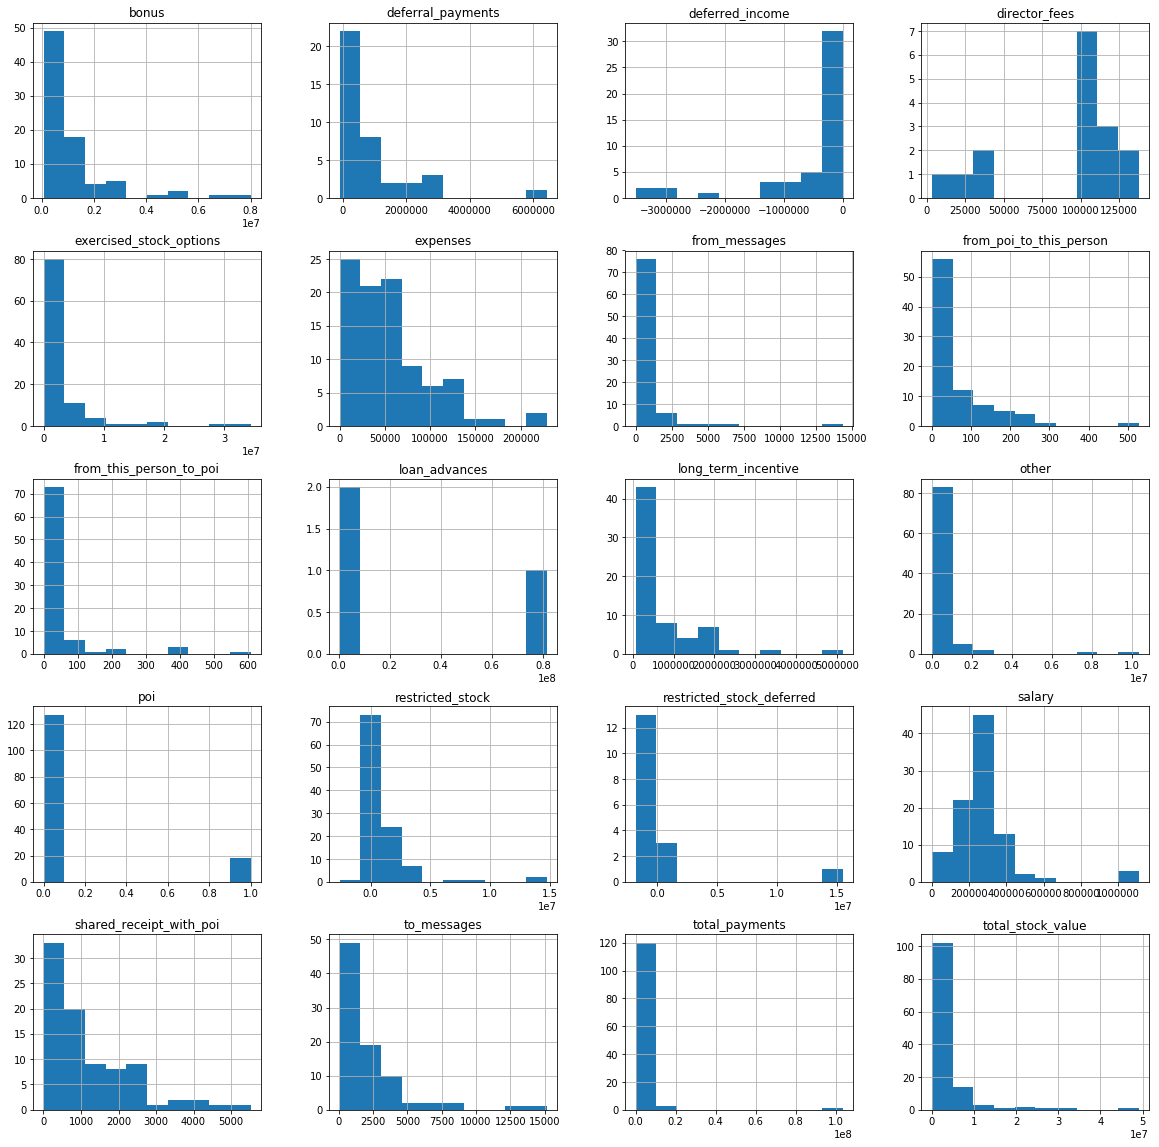

In [149]:
en_dfT.hist(figsize=(20,20));

In [154]:
en_dfT.loc[en_dfT['total_payments'] > en_dfT['total_payments'].quantile(.95)]

,index,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
3,BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
11,BHATNAGAR SANJAY,NaN,NaN,NaN,137864.0,sanjay.bhatnagar@enron.com,2604490.0,NaN,29.0,0.0,...,NaN,137864.0,False,-2604490.0,15456290.0,NaN,463.0,523.0,15456290.0,NaN
47,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,...,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
78,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0
79,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
86,MARTIN AMANDA K,NaN,85430.0,NaN,NaN,a..martin@enron.com,2070306.0,8211.0,230.0,8.0,...,5145434.0,2818454.0,False,NaN,NaN,349487.0,477.0,1522.0,8407016.0,2070306.0
122,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0


> When the histograms of the new dataframe are made, they are still pretty skewed, but look at lot better. For example, there is a record in the *from_messages* column that is two orders of magnitude above the mean, but I checked it out and it is a real person, and since I have no further reason to believe that it is an error, I will just take it to be data.

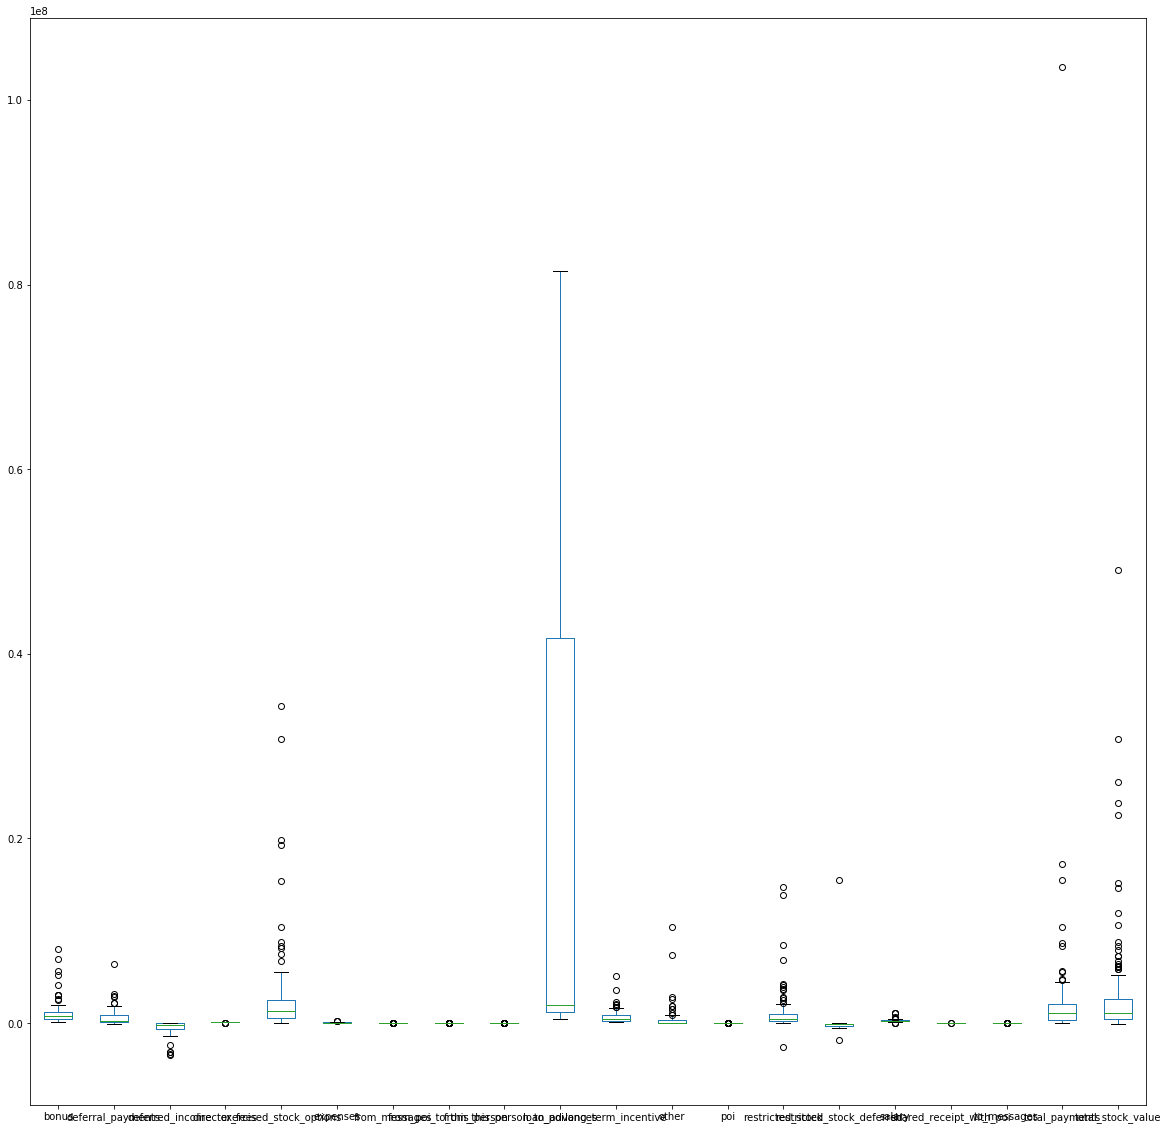

In [153]:
en_dfT.plot.box(figsize=(20,20));

> This figure shows a box-plot of each variable in the dataframe.  There are a few plots that look comically skewed, particularly the *total_payments*. I checked out the 95th percentile and above for that column, and the largest value is Ken Lay, the CEO. Since this whole thing is about fraudulent enrichment, I guess it makes sense to have these strange distributions of value.

## Prepare for Model Creation

> Most (all?) ML models will reject any record that has a NaN for any features. Since there are so many NaNs, to get off the ground, I'm going to fill them with zero. 

> Now I load feature and target data into X and Y variables.  These will be used to make the train / test split. 

> For the featured data, I remove the index, email address, and poi columns because the first two would cause the data to overfit, and the second contains the labels, respectively.  

In [379]:
# print("Percent POI's in overall dataset: {}%".format(round(en_dfT['poi'].mean()*100)))
# print("Percent POI's in training set: {}%".format(round(y_train.mean()*100)))
# print("Percent POI's in test set: {}%".format(round(y_test.mean()*100)))

Percent POI's in overall dataset: 12.0%
Percent POI's in training set: 14.0%
Percent POI's in test set: 5.0%


> One potential issue is the imbalanced nature of the dataset in terms of POI / not-POI.  Only 12% of the overall records are 

> Only 12% of the records in the overall dataset are POIs.  This means that our model would be about 88% accurate if it predicted not-POI for every single record.  This means we will need to either alter the training data to make it balanced in terms of POI / not-POI, or use different metrics like Area Under ROC (AUROC) to calculate the probability that the model is predicting a true negative or a false negative.  Realistically, we should do both.

> Before any fancy stuff, I want to just fit a bunch of models and get a baseline idea of how they are working.

# Script Stuff

In [2]:
#!/usr/bin/python

import sys
import os
import pickle
from pprint import pprint
import numpy as np

os.chdir('/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project')

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Task 1: Select what features you'll use.

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
    
# show list of possible features
feature_names = list(list(data_dict.values())[0].keys())
pprint(feature_names)

### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi',   #kept all features but email_address (text)
                 'salary',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'loan_advances',
                 'bonus',
                 'restricted_stock_deferred',
                 'deferred_income',
                 'total_stock_value',
                 'expenses',
                 #'from_poi_to_this_person',
                 'exercised_stock_options',
                 'from_messages',
                 'other',
                 #'from_this_person_to_poi',
                 'long_term_incentive',
                 #'shared_receipt_with_poi',
                 'restricted_stock',
                 'director_fees']

### Task 2: Remove outliers
data_dict.pop('TOTAL')

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'email_address',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'director_fees']


In [4]:
# split data into train / test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# check balance of POIs across data
print("Percent POI's in overall dataset: {}%".format(np.mean(labels)*100))
print("Percent POI's in training set: {}%".format(np.mean(y_train)*100))
print("Percent POI's in test set: {}%".format(round(np.mean(y_test)*100, 2)))

Percent POI's in overall dataset: 12.5%
Percent POI's in training set: 13.0%
Percent POI's in test set: 11.36%


In [5]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:3
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # ML models
from sklearn.svm import SVC # model
from sklearn.linear_model import LogisticRegression # model 
from sklearn.model_selection import GridSearchCV # for selecting the best model params
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix # for evaluating model performance
from sklearn import metrics
from sklearn.model_selection import train_test_split # for creating the test / train datasets
from sklearn.pipeline import Pipeline

# make wee scoring function
def ScoreMe(model, y_test, preds):
    print("{}: accuracy report".format(model))
    print("The accuracy is {}".format(accuracy_score(y_test,preds)))
    print("The recall is {}".format(recall_score(y_test, preds)))
    print("The precision is {}".format(precision_score(y_test, preds)))
    print(confusion_matrix(y_test, preds))
    return

I picked six supervised classification algorithms to test. My idea is to test 
the algorithms raw, without any dimensionality reduction, feature transformation 
or algorithm tuning. This will help me get a baseline understanding of how the
 models perform. After that, I will set up a grid of parameters for each 
 algorithm and use grid search to find each one's best estimator parameters.  

Based on that, I might try some dimensionality reduction, feature scaling, and feature selection. 

Which algorithms could use feature scaling:
* KNN
* Logistic Regression
* SVM
* Prior to PCA
    

In [6]:
### models, raw, no grid search / tuning, or feature estimation
    
## logistic regression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
lr_preds = clf_lr.predict(X_test)
ScoreMe("logistic regression", y_test, lr_preds)

## support vectors
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
svc_preds = clf_svc.predict(X_test)
ScoreMe("SVC", y_test, svc_preds)

## random forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
rf_preds = clf_rf.predict(X_test)
ScoreMe("RF", y_test, rf_preds)

## gradient boosting
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)
gb_preds = clf_gb.predict(X_test)
ScoreMe("gradient boost",y_test, gb_preds)

## gaussian naive bayes
clf_gNB = GaussianNB()
clf_gNB.fit(X_train, y_train)
gNB_preds = clf_gNB.predict(X_test)
ScoreMe("GaussianNB", y_test, gNB_preds)

## K Neighbors Classifier
clf_knc = KNeighborsClassifier(n_neighbors = 2)
clf_knc.fit(X_train, y_train)
knc_preds = clf_knc.predict(X_test)
ScoreMe("k neighbors", y_test, knc_preds)

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!

grid_params = {'learning_rate': [.01, .05, .1],
              'max_depth': [1,3,5,7],
              'max_features': [1,5,10]}

gb = GradientBoostingClassifier()

gb_GS = GridSearchCV(gb, grid_params)

gb_GS.fit(X_train, y_train)

gb_GS_preds = gb_GS.best_estimator_.predict(X_test)
print("score:", gb_GS.score(X_test, y_test))
confusion_matrix(y_test, gb_GS_preds)

logistic regression: accuracy report
The accuracy is 0.8181818181818182
The recall is 0.2
The precision is 0.2
[[35  4]
 [ 4  1]]
SVC: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  0]
 [ 5  0]]
RF: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.2
The precision is 1.0
[[39  0]
 [ 4  1]]
gradient boost: accuracy report
The accuracy is 0.8409090909090909
The recall is 0.2
The precision is 0.25
[[36  3]
 [ 4  1]]
GaussianNB: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.4
The precision is 0.5
[[37  2]
 [ 3  2]]
k neighbors: accuracy report
The accuracy is 0.8636363636363636
The recall is 0.0
The precision is 0.0
[[38  1]
 [ 5  0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


score: 0.886363636364


array([[39,  0],
       [ 5,  0]])

In [467]:
## Gradient Boosting Classifier

estimators = [('clf', GradientBoostingClassifier())] 
clf = Pipeline(estimators) 

clf.fit(X_train, y_train)

gb_preds = clf.predict(X_test)

## grid search with pipeline

f1_scorer = make_scorer(f1_score)
grid_params = dict(clf__learning_rate=[.01, .05, .1],
                   clf__max_depth=[1,3,5,7],
                   clf__max_features=[1,5,10])

clf_gs = GridSearchCV(clf, grid_params, scoring='f1')
clf_gs.fit(X_train, y_train)

gs_gb_preds = clf_gs.predict(X_test)

ScoreMe("gradient boost",y_test, gb_preds)
ScoreMe("gradient boost _ gsBestEst",y_test, gs_gb_preds)

clf_gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

In [479]:
## logistic regression

estimators = [('clf', LogisticRegression())] 
clf = Pipeline(estimators) 

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

## grid search with pipeline

grid_params = dict(clf__C=[0.001,0.01,0.1,1,10,100],
                   clf__solver=["newton-cg", "liblinear", "sag", "saga"])

clf_gs = GridSearchCV(clf, grid_params, scoring="f1")
clf_gs.fit(X_train, y_train)

gs_preds = clf_gs.predict(X_test)

ScoreMe("logistic regression", y_test, preds)
ScoreMe("logistic regression _ gsBestEst",y_test, gs_preds)

clf_gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisi

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the co

logistic regression: accuracy report
The accuracy is 0.8181818181818182
The recall is 0.2
The precision is 0.2
[[35  4]
 [ 4  1]]
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.8636363636363636
The recall is 0.4
The precision is 0.4
[[36  3]
 [ 3  2]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


{'clf__C': 0.001, 'clf__solver': 'newton-cg'}

In [ ]:
## Support Vectors Classifier
estimators = [('clf', SVC())] 
clf = Pipeline(estimators) 

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

# ## grid search with pipeline

grid_params = dict(clf__kernel=[ 'linear'])#,
#                    clf__C=[0.001, 0.01, 0.1, 1, 5, 10],
#                    clf__gamma=[0.001, 0.01, 0.1, .5, 1],
                    #'rbf', 'linear', 'poly', sigmoid'])

clf_gs = GridSearchCV(clf, grid_params, scoring='f1')
clf_gs.fit(X_train, y_train)

gs_preds = clf_gs.predict(X_test)

ScoreMe("Support Vectors", y_test, preds)
ScoreMe("Support Vectors _ gsBestEst",y_test, gs_preds)

clf_gs.best_params_

In [ ]:
## Random Forest Classifier
clf_rf = RandomForestClassifier()

estimators = [('clf', RandomForestClassifier())] 
clf = Pipeline(estimators) 

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

## grid search with pipeline

 = dict(clf__C=[0.001,0.01,0.1,1,10,100],
                   clf__solver=["newton-cg", "liblinear", "sag", "saga"])
    
grid_params = dict(clf__max_depth=[3, None],
                   clf__max_features = sp_randint(1, 11),
                   "min_samples_split": sp_randint(2, 11),
                   "min_samples_leaf": sp_randint(1, 11),
                   "bootstrap": [True, False],
                   "criterion": ["gini", "entropy"])


clf_gs = GridSearchCV(clf, grid_params, scoring="f1")
clf_gs.fit(X_train, y_train)

gs_preds = clf_gs.predict(X_test)

ScoreMe("logistic regression", y_test, preds)
ScoreMe("logistic regression _ gsBestEst",y_test, gs_preds)

clf_gs.best_params_

In [ ]:
sp_randint(1, 11)

In [502]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

### Resources

* https://elitedatascience.com/imbalanced-classes 

* http://scikit-learn.org/

* https://www.quora.com/What-is-the-difference-between-principal-component-analysis-PCA-and-feature-selection-in-machine-learning-Is-PCA-a-means-of-feature-selection

* https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32

* https://datascience.stackexchange.com/questions/16062/is-feature-selection-necessary

* http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

* https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm/252618

* http://www.dataschool.io/comparing-supervised-learning-algorithms/

* https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

* https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

* https://gist.github.com/HackerEarthBlog/a84a446810494d4ca0c178e864ab2391

In [ ]:
print("AUROC: {}".format(round(roc_auc_score(y_test, (1-lr_preds)), 2)))
print("f1 score: {}".format(round(f1_score(y_test, lr_preds), 3)))